In [64]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.decomposition import PCA, TruncatedSVD, NMF, FastICA, FactorAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
df_breast_cancer = pd.read_csv('data_sets/breast_cancer.csv')
df_breast_cancer.drop(axis=1,labels=["id","Unnamed: 32"],inplace=True)
X_breast_cancer = df_breast_cancer.drop(axis=1,labels='diagnosis')
le = LabelEncoder()
Y_breast_cancer = le.fit_transform(df_breast_cancer['diagnosis'])


df_parkinsons = pd.read_csv('data_sets/parkinsons.csv')
df_parkinsons.drop(axis=1,labels=["name"],inplace=True)
X_parkinsons = df_parkinsons.drop(axis=1,labels='status')
Y_parkinsons = df_parkinsons['status']


df_diabetes = pd.read_csv('data_sets/diabetes dataset.csv')
df_diabetes.drop_duplicates(inplace=True)
X_diabetes = df_diabetes.drop(axis=1,labels='Outcome')
Y_diabetes = df_diabetes['Outcome']


df_lung = pd.read_csv('data_sets/lung cancer.csv')
X_lung = df_lung.drop(axis=1,labels='LUNG_CANCER')
le = LabelEncoder()
Y_lung = le.fit_transform(df_lung['LUNG_CANCER'])
X_lung['GENDER'] = le.fit_transform(X_lung['GENDER'])


df_heart = pd.read_csv('data_sets/heart.csv')
df_heart.drop_duplicates(inplace=True)
X_heart = df_heart.drop(axis=1,labels='target')
Y_heart = df_heart['target']


In [69]:
def apply_scaler(X,Y):
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42, stratify=Y)
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.fit_transform(x_test)
    return x_train_scaled,x_test_scaled,y_train,y_test

In [70]:
def apply_decompsition(dec_method,X_train,X_test):
    try:
        method = dec_method
        X_train_decomp = method.fit_transform(X_train)
        X_test_decomp = method.transform(X_test)
    except(ValueError):
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.fit_transform(X_test)
        X_train_decomp = method.fit_transform(X_train_scaled)
        X_test_decomp = method.transform(X_test_scaled)

    return X_train_decomp,X_test_decomp

SVM

In [71]:
def apply_svm(x_train_svm,x_test_svm,y_train,y_test):  
    svm_model = SVC(kernel='linear', C=1, gamma='auto',random_state=42)
    svm_model.fit(x_train_svm,y_train)
    y_pred_train = svm_model.predict(x_train_svm)
    y_pred_test = svm_model.predict(x_test_svm)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    return train_accuracy,test_accuracy




CNN


In [72]:
def apply_cnn(x_train_cnn,x_test_cnn,y_train,y_test):
    x_train_reshaped = x_train_cnn.reshape(x_train_cnn.shape[0], x_train_cnn.shape[1], 1, 1)
    x_test_reshaped = x_test_cnn.reshape(x_test_cnn.shape[0], x_test_cnn.shape[1], 1, 1)

    # CNN model architecture
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(x_train_cnn.shape[1], 1, 1), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(x_train_reshaped, y_train,validation_split=0.2, epochs=30, batch_size=32, verbose=0)
    
    train_loss, train_accuracy = model.evaluate(x_train_reshaped, y_train)
    test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test)
    
    return train_accuracy, test_accuracy

Random Forest

In [73]:
def apply_rnd(x_train_rnd,x_test_rnd,y_train,y_test):
    rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,n_jobs=-1, random_state=42)
    rnd_clf.fit(x_train_rnd, y_train)
    y_pred_train = rnd_clf.predict(x_train_rnd)
    y_pred_test = rnd_clf.predict(x_test_rnd)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    return train_accuracy, test_accuracy

LSTM

In [74]:
def apply_lstm(x_train_lstm,x_test_lstm,y_train,y_test):
    x_train_reshaped = x_train_lstm.reshape(x_train_lstm.shape[0], 1, x_train_lstm.shape[1])
    x_test_reshaped = x_test_lstm.reshape(x_test_lstm.shape[0], 1, x_test_lstm.shape[1])
    model = Sequential([
        LSTM(256,input_shape=(1, x_train_lstm.shape[1]), return_sequences=False),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train_reshaped, y_train, validation_split=0.2, epochs=30, batch_size=64, verbose=0)
    
    
    y_train_pred_lstm = model.predict(x_train_reshaped)
    y_train_pred_binary = (y_train_pred_lstm > 0.5).astype(int)
    train_accuracy = accuracy_score(y_train, y_train_pred_binary)
    
    y_test_pred_lstm = model.predict(x_test_reshaped)
    y_test_pred_binary = (y_test_pred_lstm > 0.5).astype(int)
    test_accuracy = accuracy_score(y_test, y_test_pred_binary)
    return train_accuracy, test_accuracy

knn

In [75]:
def apply_knn(x_train_knn,x_test_knn,y_train,y_test):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train_knn, y_train)
    y_pred_train = knn.predict(x_train_knn)
    y_pred_test = knn.predict(x_test_knn)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    return train_accuracy, test_accuracy

In [81]:
n_components = n_components

In [82]:
methods = {
    'PCA': PCA(n_components=n_components),  # You can adjust the number of components as needed
    'SVD': TruncatedSVD(n_components=n_components),
    'NMF': NMF(n_components=n_components),
    'ICA': FastICA(n_components=n_components),
    'Factor Analysis': FactorAnalysis(n_components=n_components)
}

In [83]:
algorithms = {
    'SVM': apply_svm,
    'CNN': apply_cnn,
    'RND': apply_rnd,
    'LSTM': apply_lstm,
    'KNN': apply_knn
}

In [85]:
diseases = {
    'diabetes':[X_diabetes,Y_diabetes],
    'breast_cancer': [X_breast_cancer,Y_breast_cancer],
    'parkinsons': [X_parkinsons,Y_parkinsons],
    'lung_cancer':[X_lung,Y_lung],
    'heart_disease':[X_heart,Y_heart],
    
}

In [86]:
results = {}
for disease_name, disease in diseases.items():
    dise = {}
    x_train_scaled, x_test_scaled,y_train,y_test = apply_scaler(disease[0],disease[1])
    for method_name, method in methods.items():
        max_components = min(x_train_scaled.shape[0], x_train_scaled.shape[1])
        n_components = min(10, max_components)
        method = method
        if method_name == 'NMF' and disease_name == 'diabetes':
            method = NMF(n_components=n_components)
        types = {}
        x_train_decom, x_test_decom = apply_decompsition(method,x_train_scaled,x_test_scaled)
        for alg_name, algorithm in algorithms.items():
            train_acc, test_acc = algorithm(x_train_decom,x_test_decom,y_train,y_test)
            types[alg_name] = {'Train Acc': round(train_acc,4), 
                            'Test Acc': round(test_acc,4)}
        dise[method_name] = types
    results[disease_name] = dise

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8694 - loss: 0.3116
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6713 - loss: 0.6560 
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8850 - loss: 0.3188 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.6817 - loss: 0.5845  
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7734 - loss: 0.5009
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7025 - loss: 0.5465 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8865 - loss: 0.3101
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.6934 - loss: 0.5835
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7617 - loss: 0.4668
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

In [87]:
results_df = pd.DataFrame.from_dict(results, orient='index')




In [89]:
results_df

,PCA,SVD,NMF,ICA,Factor Analysis
diabetes,"{'SVM': {'Train Acc': 0.7915, 'Test Acc': 0.71...","{'SVM': {'Train Acc': 0.7915, 'Test Acc': 0.71...","{'SVM': {'Train Acc': 0.6612, 'Test Acc': 0.67...","{'SVM': {'Train Acc': 0.7915, 'Test Acc': 0.71...","{'SVM': {'Train Acc': 0.7573, 'Test Acc': 0.70..."
breast_cancer,"{'SVM': {'Train Acc': 0.9802, 'Test Acc': 0.96...","{'SVM': {'Train Acc': 0.9802, 'Test Acc': 0.96...","{'SVM': {'Train Acc': 0.9319, 'Test Acc': 0.91...","{'SVM': {'Train Acc': 0.978, 'Test Acc': 0.982...","{'SVM': {'Train Acc': 0.9758, 'Test Acc': 0.97..."
parkinsons,"{'SVM': {'Train Acc': 0.859, 'Test Acc': 0.871...","{'SVM': {'Train Acc': 0.859, 'Test Acc': 0.871...","{'SVM': {'Train Acc': 0.7564, 'Test Acc': 0.74...","{'SVM': {'Train Acc': 0.859, 'Test Acc': 0.846...","{'SVM': {'Train Acc': 0.8846, 'Test Acc': 0.87..."
lung_cancer,"{'SVM': {'Train Acc': 0.9393, 'Test Acc': 0.91...","{'SVM': {'Train Acc': 0.9393, 'Test Acc': 0.91...","{'SVM': {'Train Acc': 0.8745, 'Test Acc': 0.87...","{'SVM': {'Train Acc': 0.9393, 'Test Acc': 0.91...","{'SVM': {'Train Acc': 0.9352, 'Test Acc': 0.90..."
heart_disease,"{'SVM': {'Train Acc': 0.834, 'Test Acc': 0.819...","{'SVM': {'Train Acc': 0.834, 'Test Acc': 0.819...","{'SVM': {'Train Acc': 0.8257, 'Test Acc': 0.77...","{'SVM': {'Train Acc': 0.8423, 'Test Acc': 0.81...","{'SVM': {'Train Acc': 0.8382, 'Test Acc': 0.81..."


In [88]:
results

{'diabetes': {'PCA': {'SVM': {'Train Acc': 0.7915, 'Test Acc': 0.7143},
   'CNN': {'Train Acc': 0.8599, 'Test Acc': 0.6688},
   'RND': {'Train Acc': 0.8616, 'Test Acc': 0.7208},
   'LSTM': {'Train Acc': 0.816, 'Test Acc': 0.7273},
   'KNN': {'Train Acc': 0.8062, 'Test Acc': 0.7143}},
  'SVD': {'SVM': {'Train Acc': 0.7915, 'Test Acc': 0.7143},
   'CNN': {'Train Acc': 0.8681, 'Test Acc': 0.6948},
   'RND': {'Train Acc': 0.8616, 'Test Acc': 0.7208},
   'LSTM': {'Train Acc': 0.8143, 'Test Acc': 0.7468},
   'KNN': {'Train Acc': 0.8062, 'Test Acc': 0.7143}},
  'NMF': {'SVM': {'Train Acc': 0.6612, 'Test Acc': 0.6753},
   'CNN': {'Train Acc': 0.7687, 'Test Acc': 0.7403},
   'RND': {'Train Acc': 0.8567, 'Test Acc': 0.7597},
   'LSTM': {'Train Acc': 0.7638, 'Test Acc': 0.7468},
   'KNN': {'Train Acc': 0.7932, 'Test Acc': 0.6753}},
  'ICA': {'SVM': {'Train Acc': 0.7915, 'Test Acc': 0.7143},
   'CNN': {'Train Acc': 0.8567, 'Test Acc': 0.7013},
   'RND': {'Train Acc': 0.8534, 'Test Acc': 0.7143},
 

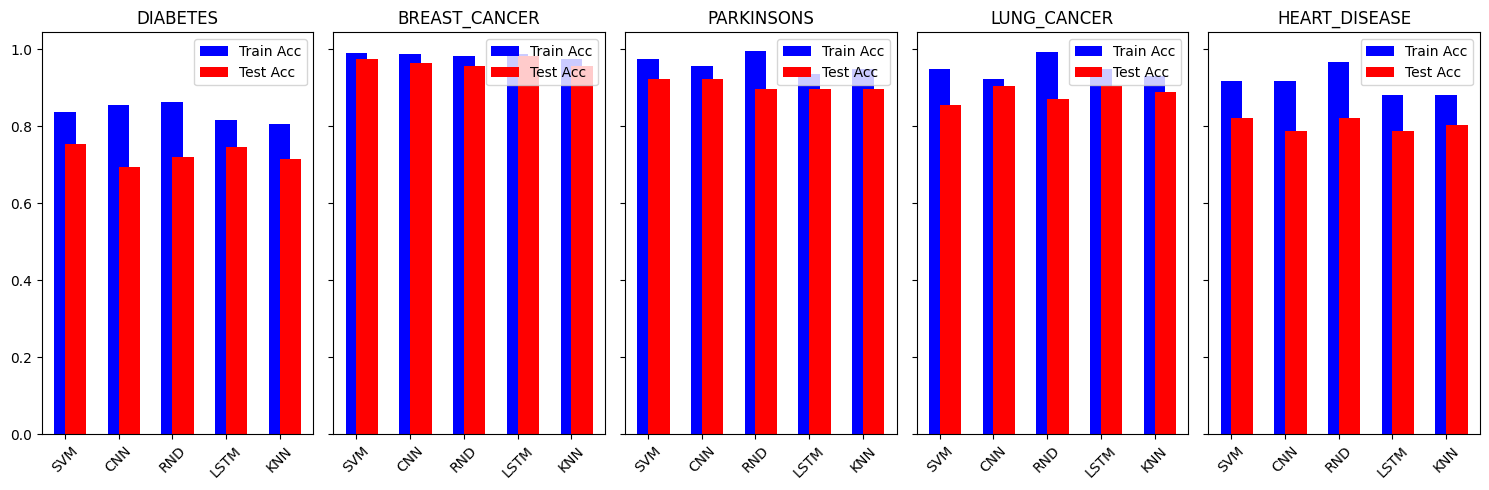

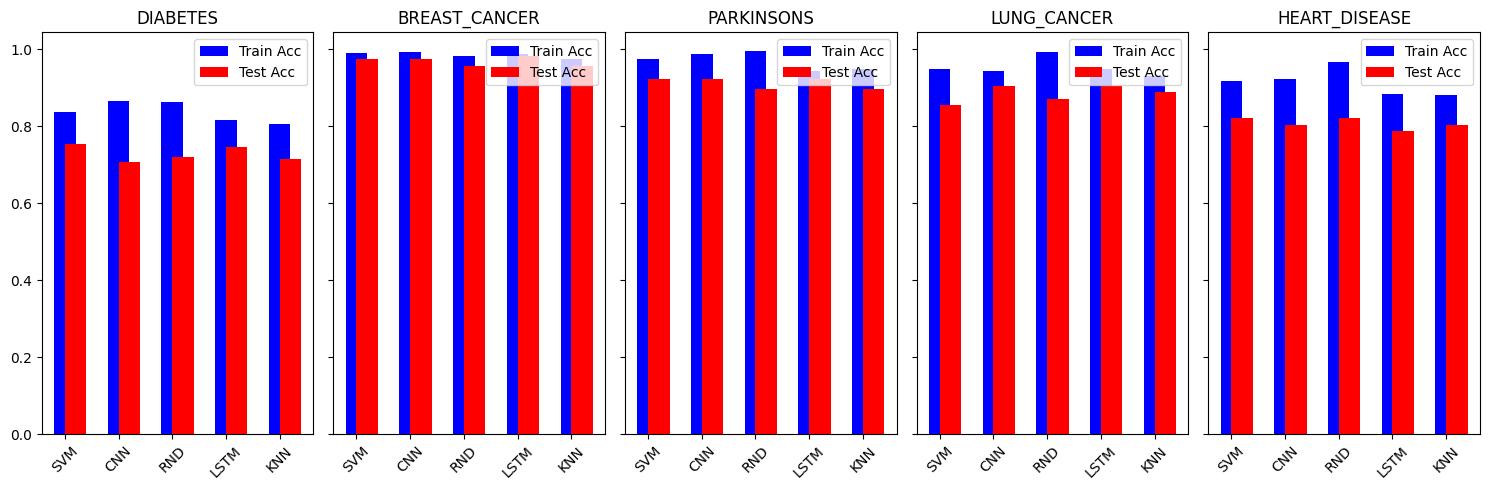

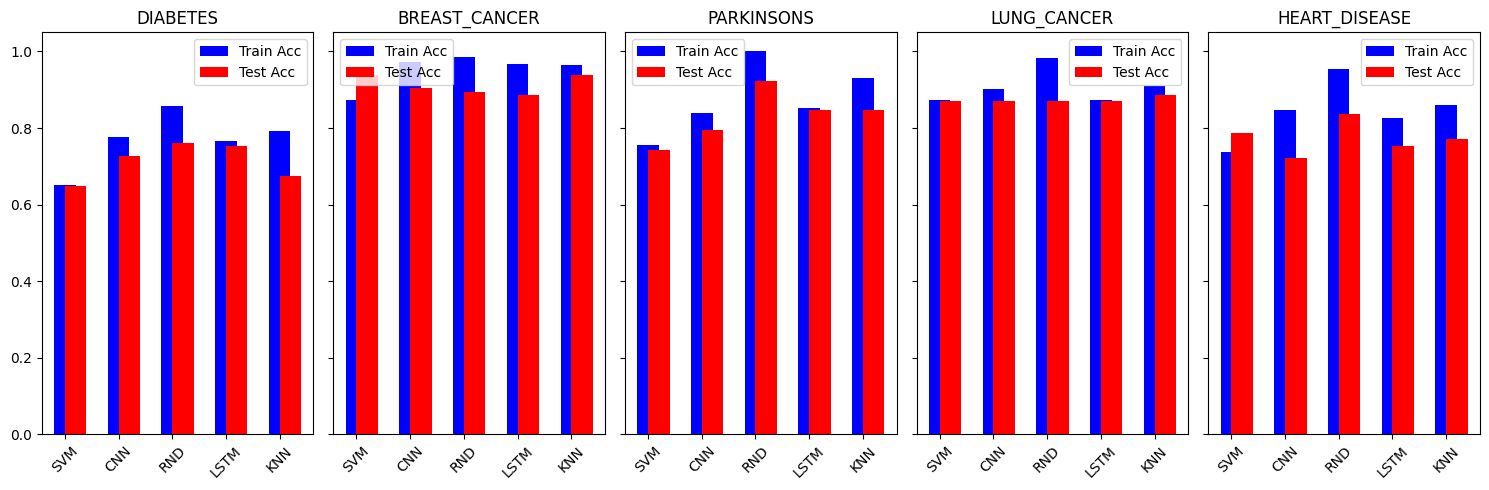

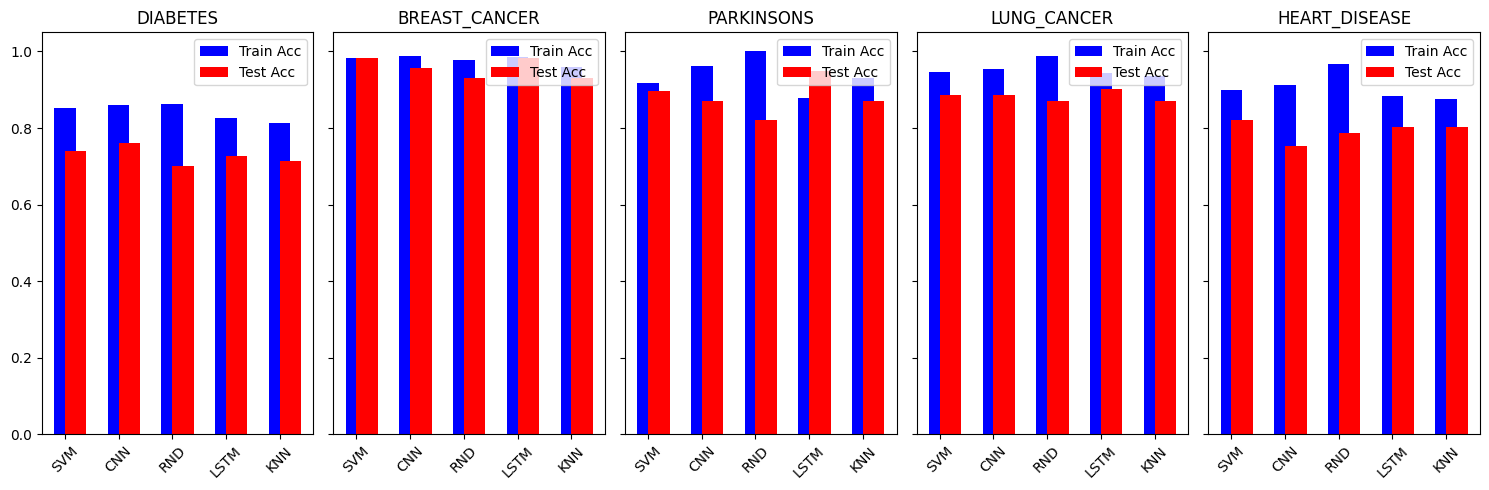

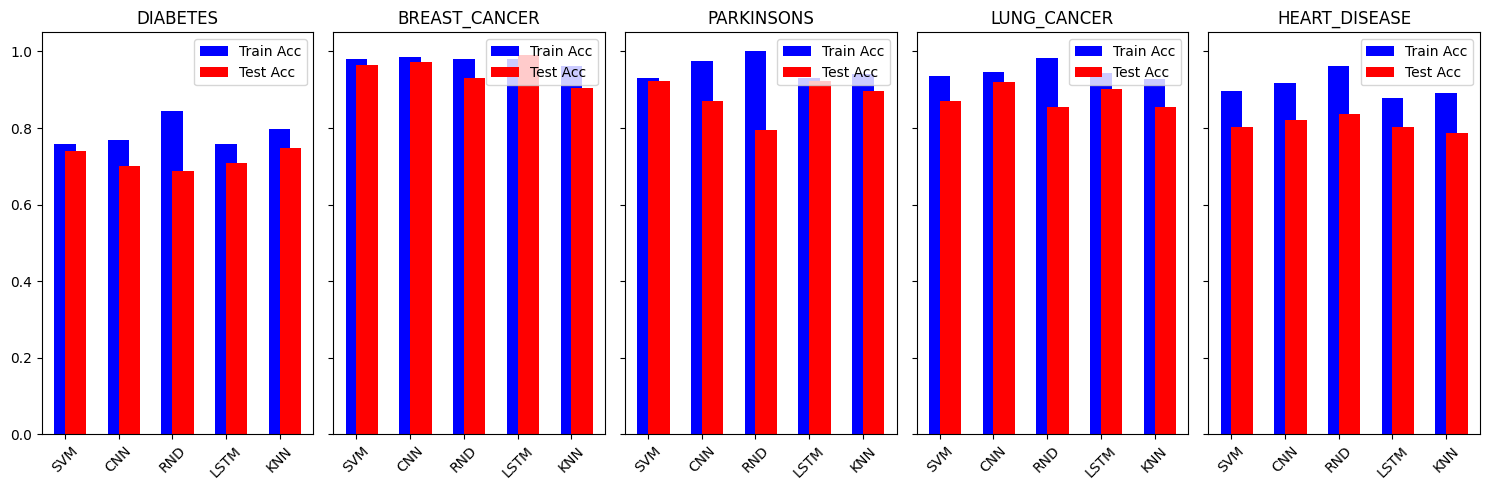

In [ ]:
import matplotlib.pyplot as plt

# Loop through each disease
for technique, diseases in results_df.items():
    fig, axes = plt.subplots(nrows=1, ncols=len(diseases), figsize=(15, 5), sharey=True)
    # fig.suptitle(f'{disease.capitalize()} Disease', fontsize=16)

    # Loop through each technique
    for i, (disease, models) in enumerate(diseases.items()):
        train_acc = []
        test_acc = []
        model_names = []

        # Loop through each model
        for model, metrics in models.items():
            model_names.append(model)
            train_acc.append(metrics['Train Acc'])
            test_acc.append(metrics['Test Acc'])

        ax = axes[i] if len(diseases) > 1 else axes  # Set the appropriate subplot
        x = range(len(model_names))
        ax.bar(x, train_acc, width=0.4, label='Train Acc', color='b', align='center')
        ax.bar(x, test_acc, width=0.4, label='Test Acc', color='r', align='edge')
        ax.set_title(disease.upper())
        ax.set_xticks(x)
        ax.set_xticklabels(model_names, rotation=45)
        ax.legend()

    plt.tight_layout()
    plt.show()
